In [2]:
import igraph as ig
import numpy as np
from graph_rl.environment.graph_navigation import GraphNavigationEnv
from graph_rl.reward_function.reward_function import ShortestPathReward
from graph_rl.graph.extended_graph import ExtendedGraph
import networkx as nx

try:
    from stable_baselines3 import PPO
    from stable_baselines3.common.env_checker import check_env
except ImportError:
        print("stable-baselines3 not installed. Run: pip install stable-baselines3")
    

In [3]:
def create_sample_graph() -> ExtendedGraph:
    """Create a sample graph for demonstration."""
    g = ExtendedGraph(directed=False, node_feature_dim=4, edge_feature_dim=2)
    # Add 10 vertices
    g.add_vertices(10)
    
    # Add some random edges
    edges = [
        (0, 1), (0, 2), (1, 3), (1, 4), (2, 5),
        (3, 6), (4, 7), (5, 8), (6, 9), (7, 9),
        (8, 9), (2, 3), (4, 5), (1, 5), (3, 7)
    ]
    g.add_edges(edges)
    

    # Generate node and embeddings. 
    # Usually those embeddings are a result aggregated information of node / edge features
    # here we only care about the numbers
    
    # To make the example a bit more expressive we add also a node feature vector which is usually of a
    # higher dimension compared to the embedding dimension

    # Generate node embeddings
    for i in range(10):
        g.vs[i]["features"] = np.random.randn(2 * g.node_feature_dim)

    # Generate edge features
    for edge in g.es:
        edge["features"] = np.random.randn(2 * g.edge_feature_dim)

    # Add random weights to edges
    g.es['weight'] = np.random.uniform(0.1, 2.0, g.ecount())
    
    # Add custom node attributes
    g.vs['type'] = np.random.choice(['A', 'B', 'C'], g.vcount())
    
    return g


# Example usage with stable-baselines3
def train_with_stable_baselines(env, total_timesteps=10000):
    """Example of how to use this environment with stable-baselines3."""
        
    # First, check if the environment is valid
    check_env(env)
    
    # Create the model
    model = PPO("MlpPolicy", env, verbose=1)
    
    # Train the agent
    model.learn(total_timesteps=total_timesteps)
    
    # Save the model
    model.save("ppo_graph_navigation")
    
    print("Model trained and saved successfully!")
    return model


In [4]:
# Create sample graph
sample_graph = create_sample_graph()

# Create custom reward function
target_node = 9  # We want to reach node 9
reward_func = ShortestPathReward(target_node=target_node)

# Create environment
env = GraphNavigationEnv(
    graph=sample_graph,
    reward_function=reward_func,
    max_steps=20,
    transition_noise=0.1,  # 10% chance of random transition
    render_mode='console',
    observation_mode='dict'  # Use dict mode for easier debugging
)


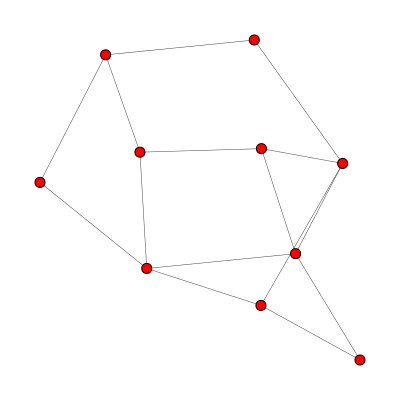

In [5]:
sample_graph.plot()

In [6]:
# Run a simple random agent as example
observation, info = env.reset(seed=42)
total_reward = 0

print("Starting navigation from node", env.current_node, "to target node", target_node)
env.render()

for _ in range(env.max_steps):
    # Get random action
    action = env.action_space.sample()
    
    # Take step
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    print("\nTook action:", action)
    print("Reward:", reward)
    env.render()
    
    if terminated or truncated:
        print("\nEpisode finished!")
        break

print(f"Total reward: {total_reward}")
print(f"Reached node {env.current_node}")
print(f"Target was node {target_node}")

# Uncomment to train with stable-baselines3
# model = train_with_stable_baselines(env)

Starting navigation from node 6 to target node 9
Current Node: 6
Node Attributes: {'features': array([ 0.21576431,  1.37309299, -0.31072072, -0.92935148, -0.75422784,
        1.12697755, -1.02445976, -0.80557832]), 'type': np.str_('A'), 'id': 6}
Available Actions: 2
  Action 0: -> Node 3 (Edge 5, Weight: 0.5239502770984771)
  Action 1: -> Node 9 (Edge 8, Weight: 0.22091560655067896)
Steps Taken: 0/20

Took action: 0
Reward: -1.0523950277098477
Current Node: 6
Node Attributes: {'features': array([ 0.21576431,  1.37309299, -0.31072072, -0.92935148, -0.75422784,
        1.12697755, -1.02445976, -0.80557832]), 'type': np.str_('A'), 'id': 6}
Available Actions: 2
  Action 0: -> Node 3 (Edge 5, Weight: 0.5239502770984771)
  Action 1: -> Node 9 (Edge 8, Weight: 0.22091560655067896)
Steps Taken: 1/20

Took action: 2
Reward: -10.0
Current Node: 6
Node Attributes: {'features': array([ 0.21576431,  1.37309299, -0.31072072, -0.92935148, -0.75422784,
        1.12697755, -1.02445976, -0.80557832]), '

# Generate Graphs

Or you can generate graphs from the implemented generators

{'current_node': 2, 'node_features': array([ 0.21905661, -0.26758754,  1.0826517 , -1.29274839]), 'neighbors': array([0, 1, 5, 6, 7, 8, 0, 0], dtype=int32), 'edge_features': array([[0.218, 1.   ],
       [0.76 , 1.   ],
       [0.182, 1.   ],
       [0.695, 1.   ],
       [0.46 , 1.   ],
       [0.401, 1.   ],
       [0.   , 0.   ],
       [0.   , 0.   ]]), 'valid_actions': array([1, 1, 1, 1, 1, 1, 0, 0], dtype=int8), 'steps_taken': 0}
[1, 2, 7, 9, 12, 15]


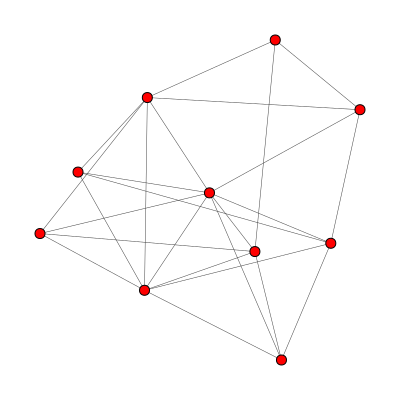

In [24]:
from graph_rl.environment.graph_navigation import GraphNavigationEnv
from graph_rl.reward_function.reward_function import ShortestPathReward


from graph_rl.graph.generator import ErdosRenyiGenerator


sample_graph = ErdosRenyiGenerator(10, 0.5, directed=False, node_feature_dim=4, edge_feature_dim=2).generate()

target_node = 9  # We want to reach node 9
reward_func = ShortestPathReward(target_node=target_node)

# Create environment
env = GraphNavigationEnv(
    graph=sample_graph,
    reward_function=reward_func,
    max_steps=20,
    transition_noise=0.1,  # 10% chance of random transition
    render_mode='console',
    observation_mode='dict'  # Use dict mode for easier debugging
)

obs, info = env.reset()
print(obs)

print(env.graph.incident(env.current_node, mode="out")), 
env.graph.plot()

In [6]:
import numpy as np
np.stack([np.zeros(2), np.zeros(3)])

ValueError: all input arrays must have the same shape